<a href="https://colab.research.google.com/github/KostasKosmas/THELONIOS/blob/main/%CE%9A%CE%B1%CE%BB%CF%8E%CF%82_%CE%BF%CF%81%CE%AF%CF%83%CE%B1%CF%84%CE%B5_%CF%83%CF%84%CE%BF_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install ta ccxt binance pandas numpy matplotlib tensorflow keras


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.6/288.6 kB 20.5 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=3cc8b11c4c5209bbe2f4fc5d59bde0df34ad37ce81ccd68362696c3d646b0b1c
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.11.11
    Uninstalling aiohttp-3.11.11:
      Successfully uninstalled aiohttp-3.11.11


In [9]:
!pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


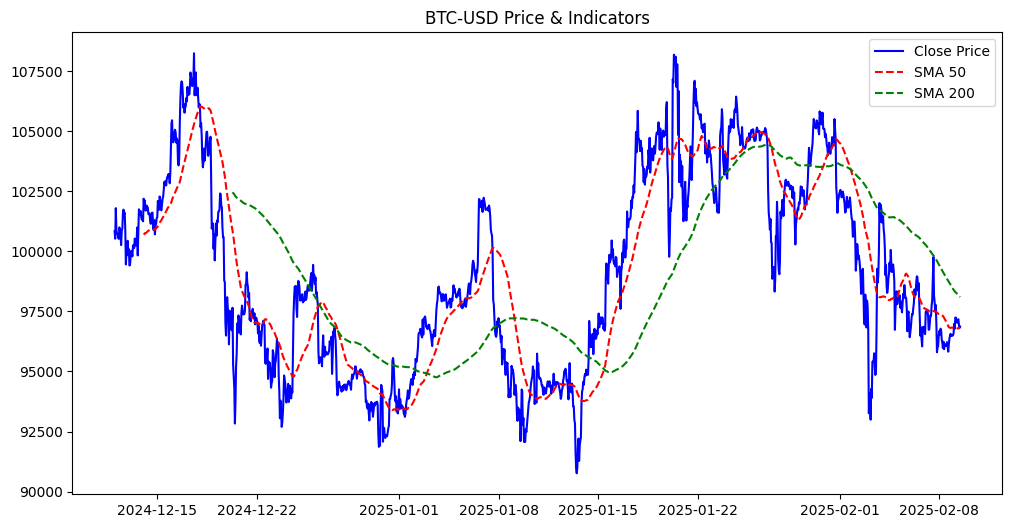

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0550
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0041
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0043
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0039
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0035
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0035
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0034
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0031
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0023
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0024
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0021
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0020
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0020
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0020
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0017
Epoch 16/20
58/

<ipython-input-3-8c5dde72e686>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predictions'] = predictions


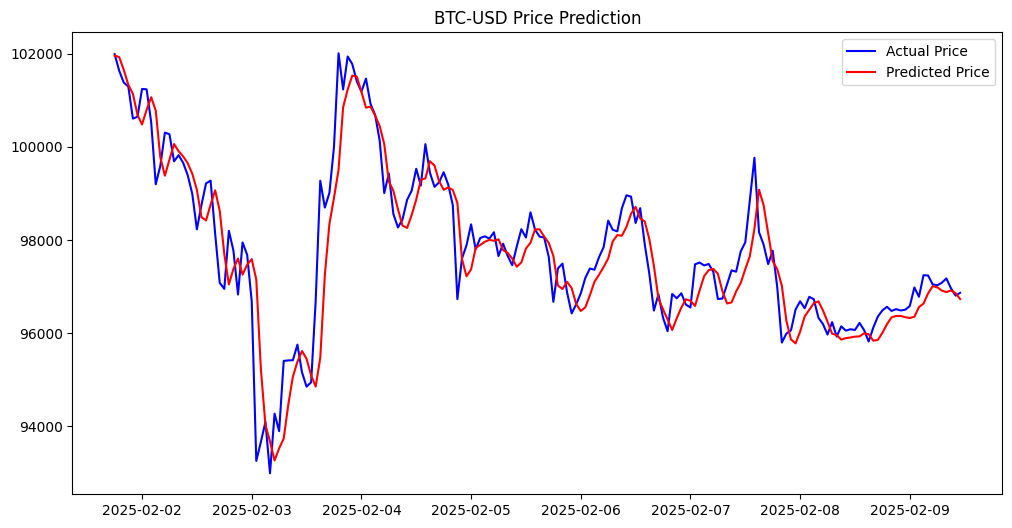

In [3]:
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import ta
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
import time

# Εγκατάσταση απαραίτητων βιβλιοθηκών
!pip install ta pandas numpy matplotlib tensorflow keras

# Λήψη ιστορικών δεδομένων από Yahoo Finance
import yfinance as yf

def get_historical_data(symbol='BTC-USD', interval='1h', period='60d'):
    df = yf.download(tickers=symbol, interval=interval, period=period)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    return df

# Υπολογισμός τεχνικών δεικτών
def add_indicators(df):
    df['RSI'] = ta.momentum.RSIIndicator(df['close'], window=14).rsi()
    df['MACD'] = ta.trend.MACD(df['close']).macd()
    df['SMA_50'] = ta.trend.SMAIndicator(df['close'], window=50).sma_indicator()
    df['SMA_200'] = ta.trend.SMAIndicator(df['close'], window=200).sma_indicator()
    return df

# Οπτικοποίηση δεδομένων
def plot_chart(df, symbol):
    plt.figure(figsize=(12, 6))
    plt.plot(df['close'], label='Close Price', color='blue')
    plt.plot(df['SMA_50'], label='SMA 50', color='red', linestyle='dashed')
    plt.plot(df['SMA_200'], label='SMA 200', color='green', linestyle='dashed')
    plt.title(f'{symbol} Price & Indicators')
    plt.legend()
    plt.show()

# Δημιουργία AI μοντέλου για προβλέψεις
def create_model(input_shape):
    model = keras.Sequential([
        layers.LSTM(50, return_sequences=True, input_shape=input_shape),
        layers.LSTM(50, return_sequences=False),
        layers.Dense(25),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Εκπαίδευση του μοντέλου
def train_model(df):
    df = df.dropna()
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[['close']])

    train_size = int(len(scaled_data) * 0.8)
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:]

    def create_dataset(data, time_step=60):
        X, Y = [], []
        for i in range(len(data) - time_step):
            X.append(data[i:(i + time_step), 0])
            Y.append(data[i + time_step, 0])
        return np.array(X), np.array(Y)

    X_train, Y_train = create_dataset(train_data)
    X_test, Y_test = create_dataset(test_data)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    model = create_model((X_train.shape[1], 1))
    model.fit(X_train, Y_train, batch_size=16, epochs=20)

    return model, scaler, X_test, Y_test

# Προβλέψεις του μοντέλου
def make_prediction(model, scaler, X_test, df):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    df = df.iloc[-len(predictions):]
    df['Predictions'] = predictions
    return df

# Τρέξιμο του προγράμματος
symbol = 'BTC-USD'  # Μπορείς να αλλάξεις το κρυπτονόμισμα
interval = '1h'
data = get_historical_data(symbol, interval)
data = add_indicators(data)
plot_chart(data, symbol)

model, scaler, X_test, Y_test = train_model(data)
predicted_df = make_prediction(model, scaler, X_test, data)

# Οπτικοποίηση των προβλέψεων
plt.figure(figsize=(12, 6))
plt.plot(predicted_df['close'], label='Actual Price', color='blue')
plt.plot(predicted_df['Predictions'], label='Predicted Price', color='red')
plt.title(f'{symbol} Price Prediction')
plt.legend()
plt.show()


In [7]:
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import ta
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
import time
import yfinance as yf
import os

# Εγκατάσταση απαραίτητων βιβλιοθηκών
!pip install ta pandas numpy matplotlib tensorflow keras yfinance

np.set_printoptions(suppress=True)  # Απενεργοποίηση επιστημονικής σημειογραφίας

# Yahoo Finance για λήψη ιστορικών δεδομένων
def get_historical_data(symbol='BTC-USD', interval='1m', period='7d'):
    df = yf.download(tickers=symbol, interval=interval, period=period)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    return df

# Υπολογισμός τεχνικών δεικτών
def add_indicators(df):
    df['RSI'] = ta.momentum.RSIIndicator(df['close'], window=14).rsi()
    df['MACD'] = ta.trend.MACD(df['close']).macd()
    df['SMA_50'] = ta.trend.SMAIndicator(df['close'], window=50).sma_indicator()
    df['SMA_200'] = ta.trend.SMAIndicator(df['close'], window=200).sma_indicator()
    return df

# Δημιουργία AI μοντέλου για προβλέψεις
def create_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(100, return_sequences=True),
        layers.LSTM(100, return_sequences=False),
        layers.Dense(50, activation='relu'),
        layers.Dense(25, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Εκπαίδευση του μοντέλου
def train_model(df):
    df = df.dropna()
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[['close']])

    train_size = int(len(scaled_data) * 0.8)
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:]

    def create_dataset(data, time_step=60):
        X, Y = [], []
        for i in range(len(data) - time_step):
            X.append(data[i:(i + time_step), 0])
            Y.append(data[i + time_step, 0])
        return np.array(X), np.array(Y)

    X_train, Y_train = create_dataset(train_data)
    X_test, Y_test = create_dataset(test_data)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    model = create_model((X_train.shape[1], 1))
    model.fit(X_train, Y_train, batch_size=16, epochs=30, verbose=1)

    # Αποθήκευση του μοντέλου μετά την εκπαίδευση
    model.save("crypto_trading_model.h5")
    return model, scaler, X_test, Y_test

# Φόρτωση αποθηκευμένου μοντέλου
if os.path.exists("crypto_trading_model.h5"):
    model = keras.models.load_model("crypto_trading_model.h5")
    print("✅ Μοντέλο φορτώθηκε επιτυχώς!")
else:
    model = None

# Προβλέψεις του μοντέλου
def make_prediction(model, scaler, X_test, df):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    df = df.iloc[-len(predictions):].copy()
    df['Predictions'] = predictions
    return df

# Συνεχής λειτουργία για εκμάθηση και πρόβλεψη
symbol = input("Εισάγετε το κρυπτονόμισμα (π.χ. BTC-USD): ")
interval = '1m'
while True:
    data = get_historical_data(symbol, interval)
    data = add_indicators(data)

    if model is None:
        model, scaler, X_test, Y_test = train_model(data)
    else:
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(data[['close']])
        X_test, _ = train_model(data)[2:]
        predicted_df = make_prediction(model, scaler, X_test, data)

    # Στρατηγική Trading με Entry, Stop Loss και Exit
    def trading_strategy(df):
        last_pred = df['Predictions'].iloc[-1]
        last_close = df['close'].iloc[-1]

        entry_price = last_close
        stop_loss = entry_price * 0.95  # 5% Stop Loss
        take_profit = entry_price * 1.15  # 15% Take Profit

        if last_pred > last_close:
            print(f"🔼 Buy Signal: Προτεινόμενο Entry Price: {entry_price:.2f}")
            print(f"📉 Stop Loss: {stop_loss:.2f}")
            print(f"💰 Take Profit: {take_profit:.2f}")
        elif last_pred < last_close:
            print(f"🔽 Sell Signal: Προτεινόμενο Entry Price: {entry_price:.2f}")
            print(f"📉 Stop Loss: {stop_loss:.2f}")
            print(f"💰 Take Profit: {take_profit:.2f}")
        else:
            print("⚖️ Hold: Η πρόβλεψη είναι σταθερή.")

    trading_strategy(predicted_df)
    time.sleep(60)  # Ενημέρωση κάθε 60 δευτερόλεπτα


Εισάγετε το κρυπτονόμισμα (π.χ. BTC-USD): BTC-USD


[*********************100%***********************]  1 of 1 completed


Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 30s 73ms/step - loss: 0.0213
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 70ms/step - loss: 5.6455e-04
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - loss: 5.0993e-04
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - loss: 3.7580e-04
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - loss: 3.1662e-04
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - loss: 2.7793e-04
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - loss: 2.5396e-04
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 67ms/step - loss: 2.4056e-04
Epoch 9/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - loss: 2.3609e-04
Epoch 10/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step - loss: 1.3977e-04
Epoch 11/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 25s 72ms/step - loss: 1.4002e-04
Epoch 12/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - loss: 1.4468e-04
Epoch 13/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - loss: 1.1913e-04
Epoch 14/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/s

🔽 Sell Signal: Προτεινόμενο Entry Price: 96867.19
📉 Stop Loss: 92023.83
💰 Take Profit: 111397.27


[*********************100%***********************]  1 of 1 completed

Epoch 1/30


352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 68ms/step - loss: 0.0183
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - loss: 4.9226e-04
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - loss: 4.2340e-04
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - loss: 3.9334e-04
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - loss: 3.0263e-04
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - loss: 2.3915e-04
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - loss: 2.7136e-04
Epoch 8/30
323/352 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 1.8913e-04

KeyboardInterrupt: 

✅ Μοντέλο φορτώθηκε επιτυχώς!
Εισάγετε το κρυπτονόμισμα (π.χ. BTC-USD): BTC-USD


[*********************100%***********************]  1 of 1 completed


Epoch 1/30
353/353 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - loss: 0.0222
Epoch 2/30
353/353 ━━━━━━━━━━━━━━━━━━━━ 37s 66ms/step - loss: 4.9087e-04
Epoch 3/30
353/353 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - loss: 4.7291e-04
Epoch 4/30
353/353 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - loss: 3.8033e-04
Epoch 5/30
353/353 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - loss: 2.7949e-04
Epoch 6/30
353/353 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - loss: 2.8533e-04
Epoch 7/30
353/353 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - loss: 2.8966e-04
Epoch 8/30
353/353 ━━━━━━━━━━━━━━━━━━━━ 43s 73ms/step - loss: 1.9349e-04
Epoch 9/30
353/353 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - loss: 4.3335e-04
Epoch 10/30
353/353 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - loss: 1.6059e-04
Epoch 11/30
353/353 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - loss: 1.4817e-04
Epoch 12/30
353/353 ━━━━━━━━━━━━━━━━━━━━ 40s 67ms/step - loss: 1.3296e-04
Epoch 13/30
353/353 ━━━━━━━━━━━━━━━━━━━━ 43s 72ms/step - loss: 1.7041e-04
Epoch 14/30
353/353 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/s

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
🔽 Sell Signal: Προτεινόμενο Entry Price: 96674.36
📉 Stop Loss: 91840.64
💰 Take Profit: 111175.51
📊 Confidence: 0.84%


/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


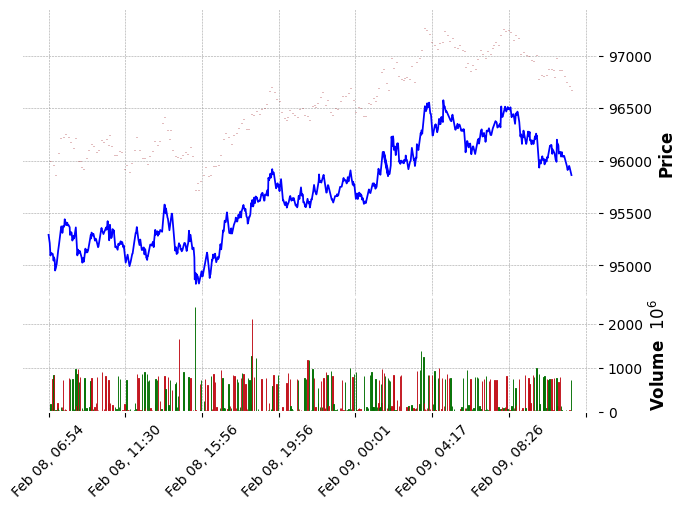

   Trade #   Entry Price     Stop Loss    Take Profit  Confidence
0        1  96674.359375  91840.641406  111175.513281    0.008397


[*********************100%***********************]  1 of 1 completed

Epoch 1/30


 66/353 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - loss: 0.0351

KeyboardInterrupt: 

In [10]:
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import ta
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
import time
import yfinance as yf
import os
import mplfinance as mpf

# Εγκατάσταση απαραίτητων βιβλιοθηκών
!pip install ta pandas numpy matplotlib tensorflow keras yfinance mplfinance

np.set_printoptions(suppress=True)  # Απενεργοποίηση επιστημονικής σημειογραφίας

# Yahoo Finance για λήψη ιστορικών δεδομένων
def get_historical_data(symbol='BTC-USD', interval='1m', period='7d'):
    df = yf.download(tickers=symbol, interval=interval, period=period)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    return df

# Υπολογισμός τεχνικών δεικτών
def add_indicators(df):
    df['RSI'] = ta.momentum.RSIIndicator(df['close'], window=14).rsi()
    df['MACD'] = ta.trend.MACD(df['close']).macd()
    df['SMA_50'] = ta.trend.SMAIndicator(df['close'], window=50).sma_indicator()
    df['SMA_200'] = ta.trend.SMAIndicator(df['close'], window=200).sma_indicator()
    return df

# Δημιουργία AI μοντέλου για προβλέψεις
def create_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(100, return_sequences=True),
        layers.LSTM(100, return_sequences=False),
        layers.Dense(50, activation='relu'),
        layers.Dense(25, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Εκπαίδευση του μοντέλου
def train_model(df):
    df = df.dropna()
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[['close']])

    train_size = int(len(scaled_data) * 0.8)
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:]

    def create_dataset(data, time_step=60):
        X, Y = [], []
        for i in range(len(data) - time_step):
            X.append(data[i:(i + time_step), 0])
            Y.append(data[i + time_step, 0])
        return np.array(X), np.array(Y)

    X_train, Y_train = create_dataset(train_data)
    X_test, Y_test = create_dataset(test_data)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    model = create_model((X_train.shape[1], 1))
    model.fit(X_train, Y_train, batch_size=16, epochs=30, verbose=1)

    # Αποθήκευση του μοντέλου μετά την εκπαίδευση
    model.save("crypto_trading_model.h5")
    return model, scaler, X_test, Y_test

# Φόρτωση αποθηκευμένου μοντέλου
if os.path.exists("crypto_trading_model.h5"):
    model = keras.models.load_model("crypto_trading_model.h5")
    print("✅ Μοντέλο φορτώθηκε επιτυχώς!")
else:
    model = None

# Προβλέψεις του μοντέλου
def make_prediction(model, scaler, X_test, df):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    df = df.iloc[-len(predictions):].copy()
    df['Predictions'] = predictions
    return df

# Σχεδίαση διαγράμματος με candlesticks και προβλέψεις
def plot_predictions(df):
    df_plot = df[['open', 'high', 'low', 'close', 'volume']].copy()
    df_plot['Predictions'] = df['Predictions']

    mpf.plot(df_plot, type='candle', style='charles', volume=True,
             addplot=mpf.make_addplot(df['Predictions'], color='blue'))

# Συνεχής λειτουργία για εκμάθηση και πρόβλεψη
trade_history = []
symbol = input("Εισάγετε το κρυπτονόμισμα (π.χ. BTC-USD): ")
interval = '1m'
while True:
    data = get_historical_data(symbol, interval)
    data = add_indicators(data)

    if model is None:
        model, scaler, X_test, Y_test = train_model(data)
    else:
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(data[['close']])
        X_test, _ = train_model(data)[2:]
        predicted_df = make_prediction(model, scaler, X_test, data)

    # Στρατηγική Trading με Entry, Stop Loss και Exit
    def trading_strategy(df):
        last_pred = df['Predictions'].iloc[-1]
        last_close = df['close'].iloc[-1]

        entry_price = last_close
        stop_loss = entry_price * 0.95  # 5% Stop Loss
        take_profit = entry_price * 1.15  # 15% Take Profit

        confidence = abs((last_pred - last_close) / last_close)
        trade_history.append([len(trade_history) + 1, entry_price, stop_loss, take_profit, confidence])

        if last_pred > last_close:
            print(f"🔼 Buy Signal: Προτεινόμενο Entry Price: {entry_price:.2f}")
            print(f"📉 Stop Loss: {stop_loss:.2f}")
            print(f"💰 Take Profit: {take_profit:.2f}")
            print(f"📊 Confidence: {confidence:.2%}")
        elif last_pred < last_close:
            print(f"🔽 Sell Signal: Προτεινόμενο Entry Price: {entry_price:.2f}")
            print(f"📉 Stop Loss: {stop_loss:.2f}")
            print(f"💰 Take Profit: {take_profit:.2f}")
            print(f"📊 Confidence: {confidence:.2%}")
        else:
            print("⚖️ Hold: Η πρόβλεψη είναι σταθερή.")

    trading_strategy(predicted_df)
    plot_predictions(predicted_df)
    trade_df = pd.DataFrame(trade_history, columns=['Trade #', 'Entry Price', 'Stop Loss', 'Take Profit', 'Confidence'])
    print(trade_df.tail())
    time.sleep(60)  # Ενημέρωση κάθε 60 δευτερόλεπτα


Εισάγετε το κρυπτονόμισμα (π.χ. BTC-USD): BTC-USD


[*********************100%***********************]  1 of 1 completed

Epoch 1/30


354/354 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - loss: 0.0249
Epoch 2/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 39s 70ms/step - loss: 5.6710e-04
Epoch 3/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - loss: 4.4366e-04
Epoch 4/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - loss: 3.4729e-04
Epoch 5/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - loss: 3.3793e-04
Epoch 6/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - loss: 2.6381e-04
Epoch 7/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 39s 65ms/step - loss: 2.7121e-04
Epoch 8/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - loss: 2.1583e-04
Epoch 9/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - loss: 2.0510e-04
Epoch 10/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 48s 87ms/step - loss: 1.8585e-04
Epoch 11/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - loss: 1.5670e-04
Epoch 12/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - loss: 1.1190e-04
Epoch 13/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - loss: 1.5223e-04
Epoch 14/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - loss:

/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


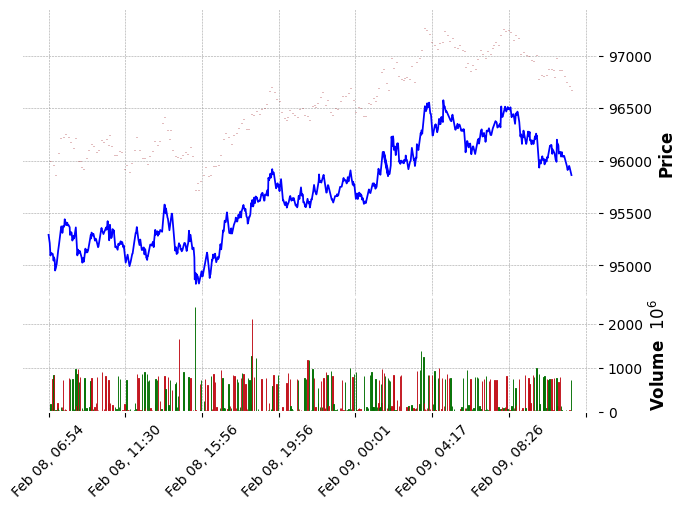

   Trade #   Entry Price     Stop Loss    Take Profit  Confidence
0        1  96674.359375  91840.641406  111175.513281    0.008397


[*********************100%***********************]  1 of 1 completed


Epoch 1/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - loss: 0.0174
Epoch 2/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - loss: 5.4494e-04
Epoch 3/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 42s 64ms/step - loss: 4.1130e-04
Epoch 4/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - loss: 3.7508e-04
Epoch 5/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - loss: 2.8251e-04
Epoch 6/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - loss: 2.6422e-04
Epoch 7/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - loss: 2.2509e-04
Epoch 8/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - loss: 2.1887e-04
Epoch 9/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - loss: 1.7346e-04
Epoch 10/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - loss: 1.5101e-04
Epoch 11/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - loss: 1.2059e-04
Epoch 12/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - loss: 1.2081e-04
Epoch 13/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - loss: 1.2331e-04
Epoch 14/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/s

/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


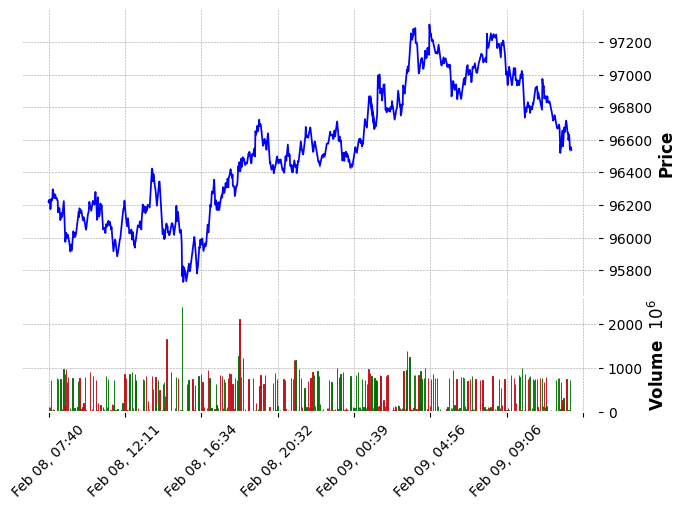

   Trade #   Entry Price     Stop Loss    Take Profit  Confidence
0        1  96674.359375  91840.641406  111175.513281    0.008397
1        2  96494.281250  91669.567187  110968.423437    0.000443


[*********************100%***********************]  1 of 1 completed

Epoch 1/30


355/355 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - loss: 0.0168
Epoch 2/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - loss: 4.4323e-04
Epoch 3/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 43s 75ms/step - loss: 4.6267e-04
Epoch 4/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - loss: 3.4351e-04
Epoch 5/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 42s 70ms/step - loss: 2.7722e-04
Epoch 6/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - loss: 3.0786e-04
Epoch 7/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - loss: 2.5413e-04
Epoch 8/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - loss: 2.0886e-04
Epoch 9/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - loss: 1.6978e-04
Epoch 10/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - loss: 1.9025e-04
Epoch 11/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 43s 70ms/step - loss: 1.9474e-04
Epoch 12/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - loss: 1.6057e-04
Epoch 13/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - loss: 1.5659e-04
Epoch 14/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - loss:

/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


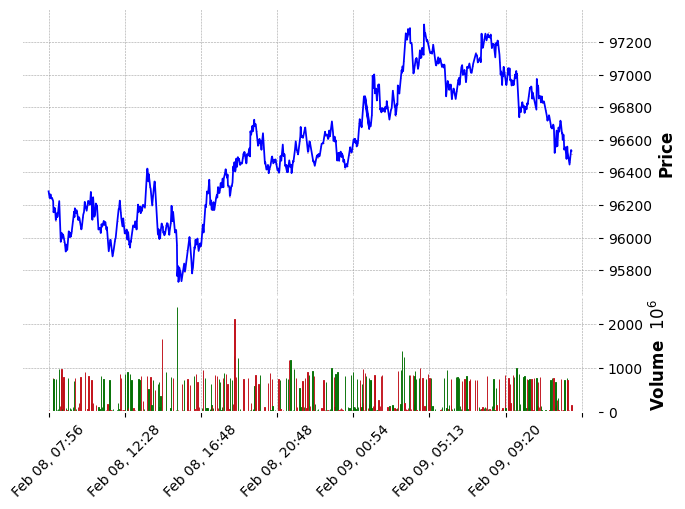

   Trade #   Entry Price     Stop Loss    Take Profit  Confidence
0        1  96674.359375  91840.641406  111175.513281    0.008397
1        2  96494.281250  91669.567187  110968.423437    0.000443
2        3  96512.078125  91686.474219  110988.889844    0.000208


[*********************100%***********************]  1 of 1 completed


Epoch 1/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 30s 71ms/step - loss: 0.0276
Epoch 2/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - loss: 5.1157e-04
Epoch 3/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 42s 76ms/step - loss: 4.2423e-04
Epoch 4/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 40s 73ms/step - loss: 3.6731e-04
Epoch 5/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - loss: 2.8110e-04
Epoch 6/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - loss: 2.6672e-04
Epoch 7/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - loss: 2.4567e-04
Epoch 8/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 43s 77ms/step - loss: 2.6900e-04
Epoch 9/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 39s 71ms/step - loss: 1.9710e-04
Epoch 10/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - loss: 1.5165e-04
Epoch 11/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - loss: 1.5218e-04
Epoch 12/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - loss: 1.4781e-04
Epoch 13/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 43s 77ms/step - loss: 1.2004e-04
Epoch 14/30
356/356 ━━━━━━━━━━━━━━━━━━━━ 39s 72ms/s

/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


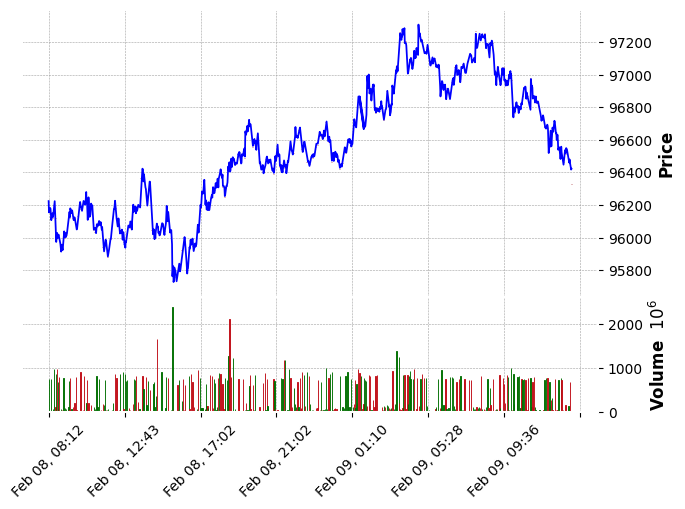

   Trade #   Entry Price     Stop Loss    Take Profit  Confidence
0        1  96674.359375  91840.641406  111175.513281    0.008397
1        2  96494.281250  91669.567187  110968.423437    0.000443
2        3  96512.078125  91686.474219  110988.889844    0.000208
3        4  96330.039062  91513.537109  110779.544922    0.000961


[*********************100%***********************]  1 of 1 completed

Epoch 1/30


357/357 ━━━━━━━━━━━━━━━━━━━━ 30s 73ms/step - loss: 0.0242
Epoch 2/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 40s 70ms/step - loss: 5.7432e-04
Epoch 3/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - loss: 4.5393e-04
Epoch 4/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - loss: 3.7858e-04
Epoch 5/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - loss: 2.9237e-04
Epoch 6/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 2.6782e-04
Epoch 7/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - loss: 2.4545e-04
Epoch 8/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 43s 76ms/step - loss: 2.1380e-04
Epoch 9/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 39s 72ms/step - loss: 2.0800e-04
Epoch 10/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - loss: 1.6769e-04
Epoch 11/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - loss: 1.4532e-04
Epoch 12/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - loss: 1.4564e-04
Epoch 13/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - loss: 1.1020e-04
Epoch 14/30
357/357 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - loss:

/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


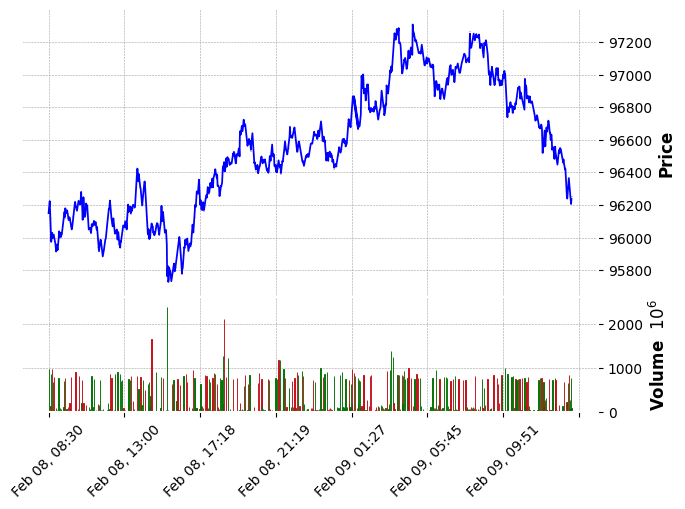

   Trade #   Entry Price     Stop Loss    Take Profit  Confidence
0        1  96674.359375  91840.641406  111175.513281    0.008397
1        2  96494.281250  91669.567187  110968.423437    0.000443
2        3  96512.078125  91686.474219  110988.889844    0.000208
3        4  96330.039062  91513.537109  110779.544922    0.000961
4        5  96255.890625  91443.096094  110694.274219    0.000195


[*********************100%***********************]  1 of 1 completed

Epoch 1/30


358/358 ━━━━━━━━━━━━━━━━━━━━ 30s 71ms/step - loss: 0.0249
Epoch 2/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - loss: 6.4033e-04
Epoch 3/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - loss: 3.9490e-04
Epoch 4/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - loss: 3.7136e-04
Epoch 5/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - loss: 3.1018e-04
Epoch 6/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 3.4310e-04
Epoch 7/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - loss: 2.5984e-04
Epoch 8/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 2.3006e-04
Epoch 9/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - loss: 2.1949e-04
Epoch 10/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 40s 72ms/step - loss: 2.1401e-04
Epoch 11/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - loss: 1.5540e-04
Epoch 12/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - loss: 1.3467e-04
Epoch 13/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 26s 73ms/step - loss: 1.2646e-04
Epoch 14/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss:

/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


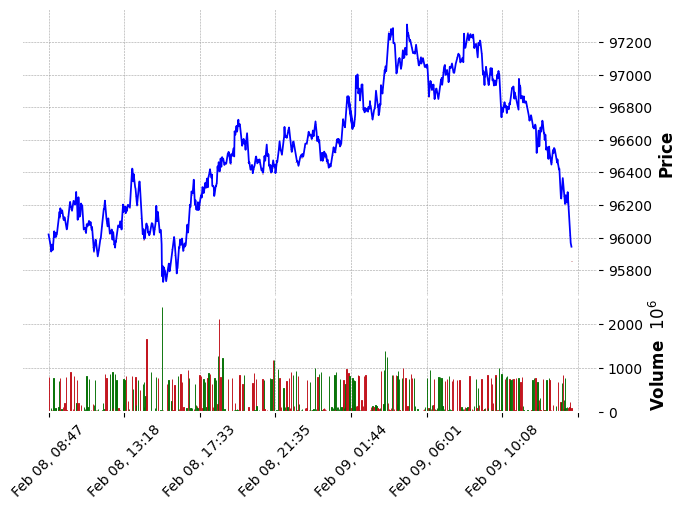

   Trade #   Entry Price     Stop Loss    Take Profit  Confidence
1        2  96494.281250  91669.567187  110968.423437    0.000443
2        3  96512.078125  91686.474219  110988.889844    0.000208
3        4  96330.039062  91513.537109  110779.544922    0.000961
4        5  96255.890625  91443.096094  110694.274219    0.000195
5        6  95857.359375  91064.491406  110235.963281    0.000904


[*********************100%***********************]  1 of 1 completed

Epoch 1/30


358/358 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - loss: 0.0207
Epoch 2/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - loss: 5.4773e-04
Epoch 3/30
358/358 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - loss: 3.8814e-04
Epoch 4/30
212/358 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 3.0356e-04

In [ ]:
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import ta
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
import time
import yfinance as yf
import os
import mplfinance as mpf

# Εγκατάσταση απαραίτητων βιβλιοθηκών
!pip install ta pandas numpy matplotlib tensorflow keras yfinance mplfinance

np.set_printoptions(suppress=True)  # Απενεργοποίηση επιστημονικής σημειογραφίας

# Yahoo Finance για λήψη ιστορικών δεδομένων
def get_historical_data(symbol='BTC-USD', interval='1m', period='7d'):
    df = yf.download(tickers=symbol, interval=interval, period=period)
    if df.empty:
        print("❌ Σφάλμα: Δεν υπάρχουν διαθέσιμα δεδομένα για το επιλεγμένο κρυπτονόμισμα!")
        return None
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    return df

# Υπολογισμός τεχνικών δεικτών
def add_indicators(df):
    df['RSI'] = ta.momentum.RSIIndicator(df['close'], window=14).rsi()
    df['MACD'] = ta.trend.MACD(df['close']).macd()
    df['SMA_50'] = ta.trend.SMAIndicator(df['close'], window=50).sma_indicator()
    df['SMA_200'] = ta.trend.SMAIndicator(df['close'], window=200).sma_indicator()
    return df.dropna()

# Δημιουργία AI μοντέλου για προβλέψεις
def create_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(100, return_sequences=True),
        layers.LSTM(100, return_sequences=False),
        layers.Dense(50, activation='relu'),
        layers.Dense(25, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Εκπαίδευση του μοντέλου
def train_model(df):
    df = df.dropna()
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[['close']])

    train_size = int(len(scaled_data) * 0.8)
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:]

    def create_dataset(data, time_step=60):
        X, Y = [], []
        for i in range(len(data) - time_step):
            X.append(data[i:(i + time_step), 0])
            Y.append(data[i + time_step, 0])
        return np.array(X), np.array(Y)

    X_train, Y_train = create_dataset(train_data)
    X_test, Y_test = create_dataset(test_data)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    model = create_model((X_train.shape[1], 1))
    model.fit(X_train, Y_train, batch_size=16, epochs=30, verbose=1)

    # Αποθήκευση του μοντέλου σε νέο format
    model.save("crypto_trading_model.keras")
    return model, scaler, X_test, Y_test

# Φόρτωση αποθηκευμένου μοντέλου
if os.path.exists("crypto_trading_model.keras"):
    model = keras.models.load_model("crypto_trading_model.keras")
    print("✅ Μοντέλο φορτώθηκε επιτυχώς!")
else:
    model = None

# Προβλέψεις του μοντέλου
def make_prediction(model, scaler, X_test, df):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    df = df.iloc[-len(predictions):].copy()
    df['Predictions'] = predictions
    return df

# Σχεδίαση διαγράμματος με candlesticks και προβλέψεις
def plot_predictions(df):
    df_plot = df[['open', 'high', 'low', 'close', 'volume']].copy()
    df_plot.index = pd.to_datetime(df.index)
    add_plot = mpf.make_addplot(df['Predictions'], color='blue')
    mpf.plot(df_plot, type='candle', style='charles', volume=True, addplot=add_plot)

# Συνεχής λειτουργία για εκμάθηση και πρόβλεψη
trade_history = []
symbol = input("Εισάγετε το κρυπτονόμισμα (π.χ. BTC-USD): ")
interval = '1m'
while True:
    data = get_historical_data(symbol, interval)
    if data is None:
        print("❌ Δεν υπάρχουν διαθέσιμα δεδομένα. Περιμένουμε νέα προσπάθεια...")
        time.sleep(60)
        continue
    data = add_indicators(data)

    if model is None:
        model, scaler, X_test, Y_test = train_model(data)
    else:
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(data[['close']])
        X_test, _ = train_model(data)[2:]
        predicted_df = make_prediction(model, scaler, X_test, data)

    # Στρατηγική Trading με Entry, Stop Loss και Exit
    def trading_strategy(df):
        last_pred = df['Predictions'].iloc[-1]
        last_close = df['close'].iloc[-1]

        entry_price = last_close
        stop_loss = entry_price * 0.95  # 5% Stop Loss
        take_profit = entry_price * 1.15  # 15% Take Profit

        confidence = abs((last_pred - last_close) / last_close)
        trade_history.append([len(trade_history) + 1, entry_price, stop_loss, take_profit, confidence])

        print(f"Trade #{len(trade_history)}: Entry: {entry_price:.2f}, Stop Loss: {stop_loss:.2f}, Take Profit: {take_profit:.2f}, Confidence: {confidence:.2%}")

    trading_strategy(predicted_df)
    plot_predictions(predicted_df)
    trade_df = pd.DataFrame(trade_history, columns=['Trade #', 'Entry Price', 'Stop Loss', 'Take Profit', 'Confidence'])
    print(trade_df.tail())
    time.sleep(60)  # Ενημέρωση κάθε 60 δευτερόλεπτα
